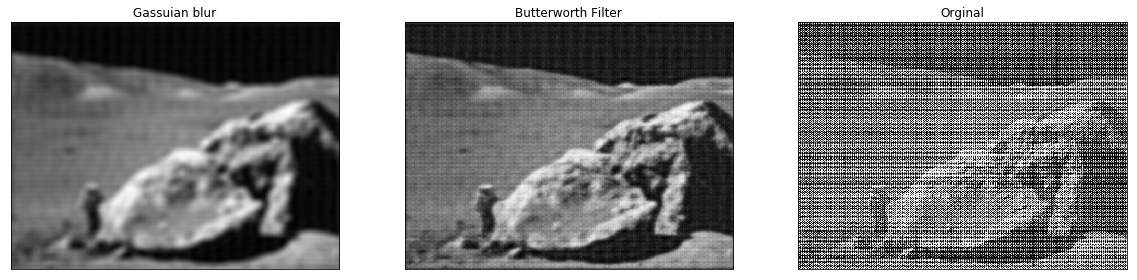

In [10]:
#butter
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
import cv2
import numpy as np
from matplotlib import pyplot as plt
a = cv2.imread('images/moonwalk.jpg',0)

c = np.fft.fft2(a)
d = np.fft.fftshift(c)

u = d.shape[0]
v = d.shape[1]
array2 = numpy.ones((u,v))
c1 = u/2 
c2 = v/2
d0 = 30.0 
t2 = 2*1
for i in range(1,u):
    for j in range(1,v):
        r1 = (i-c1)**2+(j-c2)**2
        r = math.sqrt(r1)
        if r > d0:
            array2[i,j] = 1/(1 + (r/d0)**t2)

array2 = scipy.misc.toimage(array2)
convolution2 = d * array2 
e2 = abs(fftim.ifft2(convolution2))
n = cv2.imread('images/moonwalk.jpg',0)
blur = cv2.GaussianBlur(e2,(15,15),20)
n = cv2.imread('images/moonwalk.jpg',0)
fig = plt.figure(figsize=(20,20))
titles=['Gassuian blur','Butterworth Filter','Orginal']
images=[blur,e2,n]

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

